
<h1 align="center"> Statistics and Financial Data Analysis
<h1 align="center"> Examples


In [16]:
import pandas_datareader as pd_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
import scipy as sp
import statsmodels.api as sm
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [2]:
np.random.seed(0) 

n = 50 # number of observations
p = 30 # dimensions of input

x = np.zeros(n*p)

x = np.random.normal(0,1,n*p)
x = np.reshape(x,(n,p))

X = x
X.shape

(50, 30)

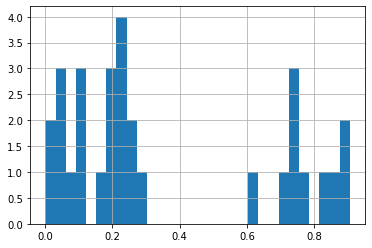

In [3]:
b1 = np.random.uniform(0,0.3,20)
b2 = np.random.uniform(0.5,1,10)

betas = np.concatenate((b2,b1))
plt.hist(betas,bins = 30);
plt.grid()

In [4]:
mu = np.zeros(n)

for i in range(n):
        mu[i] = np.dot(betas,X[i])

In [5]:
np.random.seed(1) 
simN = 100

error = np.zeros(simN)
fit_y = np.zeros(simN*n)
fit_y = np.reshape(fit_y,(simN,n))

# For same data points x_i, see different observations of y_i
for j in range(simN):
    y = np.zeros(n) 
    epsilon = np.zeros(n)
    epsilon2 = np.zeros(n)
    yReal = np.zeros(n) 
    
    for i in range(n):
        epsilon[i] = np.random.normal(0,1) 
        y[i] = mu[i]+ epsilon[i]
        epsilon2[i] = np.random.normal(0,1) 
        yReal[i] = mu[i] +epsilon2[i]
    
    linModel = sm.OLS(y,X)
    res = linModel.fit()   
    ypred = res.fittedvalues
    yres  = res.resid
    resSqr = yres**2 

    error[j]= ((ypred-yReal)**2).mean()
    fit_y[j] = ypred 
    
predErr = error.mean()
temp = np.mean(fit_y, axis = 0) 
biasEst = np.sum((temp-mu)**2)/n
temp2 = np.var(fit_y, axis = 0) 
varEst = temp2.mean()

# average over all simulations 100 the coefficient betas*x
# this will return a vector of n= 10 averages, which we take away the true fitted value


print(predErr, biasEst, varEst)
print(1+biasEst+varEst)


1.6290931423445065 0.004553688435484351 0.6137848625949448
1.6183385510304293


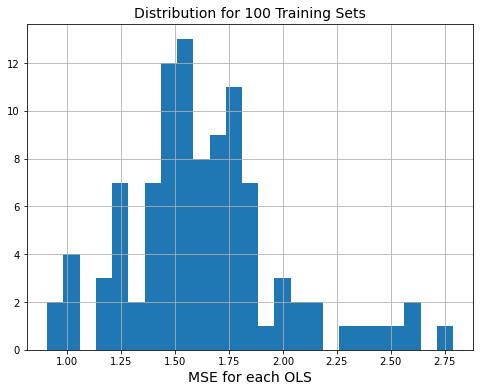

In [6]:
plt.figure(1, figsize=(8,6))
plt.hist(error, bins = 25)
plt.xlabel('MSE for each OLS', fontsize = 14)
plt.title('Distribution for 100 Training Sets', fontsize = 14)
plt.grid()
plt.savefig("MSE_Dist_OLS")

In [7]:
np.random.seed(1) 
simN = 100


error = np.zeros(simN)
fit_y = np.zeros(simN*n)
fit_y = np.reshape(fit_y,(simN,n))
print(fit_y.shape)


# For same data points, see different observations of y_i
X = x
for j in range(simN):
    y = np.zeros(n) 
    epsilon = np.zeros(n)
    epsilon2 = np.zeros(n)
    yReal = np.zeros(n) 
    
    for i in range(n):
        epsilon[i] = np.random.normal(0,1) 
        y[i] = mu[i]+ epsilon[i]
        epsilon2[i] = np.random.normal(0,1) 
        yReal[i] = mu[i] +epsilon2[i]
    
    linreg = LinearRegression(fit_intercept = False, normalize=True)
    linreg.fit(X,y)
    ypred = linreg.predict(X)
    
    error[j]= ((ypred-yReal)**2).mean()
    fit_y[j] = ypred 

predErr = error.mean()
# average over all simulations 100 the coefficient betas*x
# this will return a vector of n= 10 averages, which we take away the true fitted value
temp = np.mean(fit_y, axis = 0) 
biasEst = np.sum((temp-mu)**2)/n

temp2 = np.var(fit_y, axis = 0) 
varEst = temp2.mean()
predErrOLS = predErr

print(predErr, biasEst, varEst, 30/50)
print(1+biasEst+varEst)

(100, 50)
1.629093142344507 0.004553688435484595 0.6137848625949448 0.6
1.6183385510304293


In [8]:
def simRidgeDiffAlpha(alpha):
    
    numAlpha = len(alpha)

    predErr = np.zeros(numAlpha)
    biasEst = np.zeros(numAlpha)
    varEst = np.zeros(numAlpha)
    
    for z in range(numAlpha):

        np.random.seed(1) 
        simN = 100

        error = np.zeros(simN)
        fit_y = np.zeros(simN*n)
        fit_y = np.reshape(fit_y,(simN,n))

        # For same data points, see different observations of y_i
        X = x
        for j in range(simN):
            y = np.zeros(n) 
            epsilon = np.zeros(n)
            epsilon2 = np.zeros(n)
            yReal = np.zeros(n) 

            for i in range(n):
                epsilon[i] = np.random.normal(0,1) 
                y[i] = mu[i]+ epsilon[i]
                epsilon2[i] = np.random.normal(0,1) 
                yReal[i] = mu[i] +epsilon2[i]

            ridreg = Ridge(alpha = alpha[z],fit_intercept = False, normalize=True)
            ridreg.fit(X,y)
            ypred = ridreg.predict(X)

            error[j]= ((ypred-yReal)**2).mean()
            fit_y[j] = ypred 
            
        predErr[z] = error.mean()
        
        temp = np.mean(fit_y, axis = 0) 
        biasEst[z] = np.sum((temp-mu)**2)/n

        temp2 = np.var(fit_y, axis = 0) 
        varEst[z] = temp2.mean()

    
    return predErr, biasEst, varEst
    

In [9]:
X[0].shape

(30,)

In [10]:
alphaSimN = 25

alpha = np.linspace(0,25,alphaSimN)

predErr,biasEst,varEst = simRidgeDiffAlpha(alpha)
test = 1+biasEst + varEst

biasEst

array([0.00455369, 0.00738096, 0.01808599, 0.03439605, 0.05486546,
       0.07850425, 0.10459978, 0.13262041, 0.162159  , 0.19289729,
       0.22458252, 0.25701133, 0.29001834, 0.32346785, 0.35724768,
       0.39126451, 0.42544027, 0.45970939, 0.49401652, 0.52831486,
       0.56256471, 0.5967323 , 0.63078892, 0.66471011, 0.69847502])

In [11]:
varEst

array([0.61378486, 0.56152672, 0.52097239, 0.48774388, 0.45958557,
       0.43517328, 0.41365665, 0.39445313, 0.37714392, 0.36141655,
       0.34703095, 0.33379825, 0.32156693, 0.31021346, 0.29963568,
       0.28974812, 0.28047851, 0.27176517, 0.26355503, 0.25580211,
       0.2484663 , 0.24151238, 0.23490929, 0.22862948, 0.22264842])

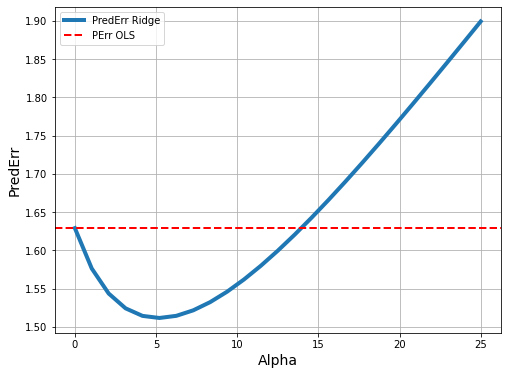

In [12]:
plt.figure(1, figsize=(8,6))
plt.plot(alpha,predErr, linewidth = 4,label = 'PredErr Ridge')
plt.axhline(y=predErrOLS, color='r', linewidth = 2,linestyle='--', label = 'PErr OLS')
plt.xlabel('Alpha', fontsize = 14)
plt.ylabel('PredErr', fontsize = 14)
plt.legend()
plt.grid()
plt.savefig("PredError_Ridge")

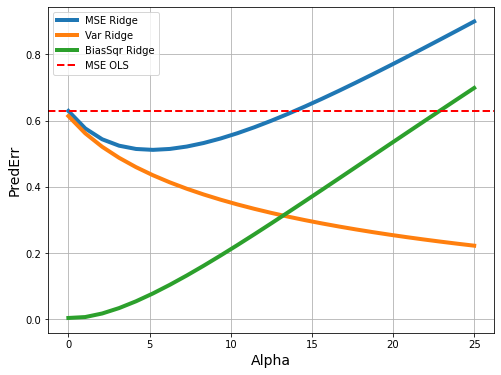

In [13]:
mse = predErr -1 
plt.figure(1, figsize=(8,6))
plt.plot(alpha,mse, linewidth = 4,label = 'MSE Ridge')
plt.plot(alpha,varEst, linewidth = 4,label = 'Var Ridge')
plt.plot(alpha,biasEst, linewidth = 4,label = 'BiasSqr Ridge')
plt.axhline(y=predErrOLS-1, color='r', linewidth = 2,linestyle='--', label = 'MSE OLS')
plt.xlabel('Alpha', fontsize = 14)
plt.ylabel('PredErr', fontsize = 14)
plt.legend()
plt.grid()
plt.savefig("PredErr_BiasVar_decomp")